# Basic classification: Classify colour images

This example is an extended version of the TensorFlow guide (https://www.tensorflow.org/tutorials/keras/classification).

We will see how to train a neural network model to classify images of clothing, like sneakers and shirts. It's okay if you don't understand all the details; this is a fast-paced overview of a complete TensorFlow program with the details explained as you go.

This guide uses [tf.keras](https://www.tensorflow.org/guide/keras), a high-level API to build and train models in TensorFlow.

In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.0.0


In [3]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.cifar10.load_data()

In [4]:
train_labels.shape

(50000, 1)

In [5]:
train_labels = train_labels[:,0]
test_labels = test_labels[:,0]

In [6]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

## Explore the data

Let's explore the format of the dataset before training the model. The following shows there are 60,000 images in the training set, with each image represented as 28 x 28 pixels:

In [7]:
train_images.shape

(50000, 32, 32, 3)

In [8]:
train_labels.shape

(50000,)

Likewise, there are 60,000 labels in the training set:

In [9]:
len(train_labels)

50000

Each label is an integer between 0 and 9:

In [10]:
train_labels

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

There are 10,000 images in the test set. Again, each image is represented as 28 x 28 pixels:

In [11]:
test_images.shape

(10000, 32, 32, 3)

And the test set contains 10,000 images labels:

In [12]:
len(test_labels)

10000

In [13]:
validation_images = test_images[:9000,]
validation_labels = test_labels[:9000,]
test_images = test_images[9000:,]
test_labels = test_labels[9000:,]

In [14]:
test_images.shape

(1000, 32, 32, 3)

In [15]:
len(test_labels)

1000

In [16]:
validation_images.shape

(9000, 32, 32, 3)

In [17]:
len(validation_labels)

9000

## Preprocess the data

The data must be preprocessed before training the network. If you inspect the first image in the training set, you will see that the pixel values fall in the range of 0 to 255:

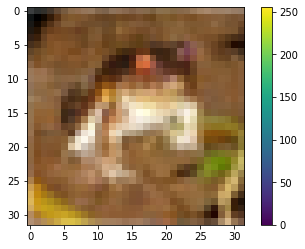

In [18]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

Scale these values to a range of 0 to 1 before feeding them to the neural network model. To do so, divide the values by 255. It's important that the *training set* and the *testing set* be preprocessed in the same way:

In [19]:
train_images = train_images / 255.0
validation_images = validation_images / 255.0
test_images = test_images / 255.0

To verify that the data is in the correct format and that you're ready to build and train the network, let's display the first 25 images from the *training set* and display the class name below each image.

In [20]:
def plot_some_inputs(input, labels):
    plt.figure(figsize=(10,10))
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(input[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[labels[i]])
    plt.show()

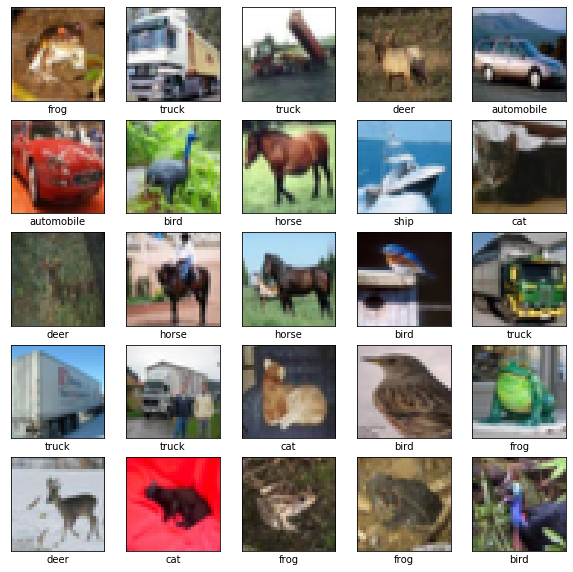

In [21]:
plot_some_inputs(train_images, train_labels)

## Build the model

Building the neural network requires configuring the layers of the model, then compiling the model.

### Set up the layers

The basic building block of a neural network is the *layer*. Layers extract representations from the data fed into them. Hopefully, these representations are meaningful for the problem at hand.

Most of deep learning consists of chaining together simple layers. Most layers, such as `tf.keras.layers.Dense`, have parameters that are learned during training.

In [22]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32, 32, 3)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

The first layer in this network, `tf.keras.layers.Flatten`, transforms the format of the images from a two-dimensional array (of 28 by 28 pixels) to a one-dimensional array (of 28 * 28 = 784 pixels). Think of this layer as unstacking rows of pixels in the image and lining them up. This layer has no parameters to learn; it only reformats the data.

After the pixels are flattened, the network consists of a sequence of two `tf.keras.layers.Dense` layers. These are densely connected, or fully connected, neural layers. The first `Dense` layer has 128 nodes (or neurons). The second (and last) layer is a 10-node *softmax* layer that returns an array of 10 probability scores that sum to 1. Each node contains a score that indicates the probability that the current image belongs to one of the 10 classes.

### Compile the model

Before the model is ready for training, it needs a few more settings. These are added during the model's *compile* step:

* *Loss function* —This measures how accurate the model is during training. You want to minimize this function to "steer" the model in the right direction.
* *Optimizer* —This is how the model is updated based on the data it sees and its loss function.
* *Metrics* —Used to monitor the training and testing steps. The following example uses *accuracy*, the fraction of the images that are correctly classified.

In [23]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

View all the layers of the network using the model's `summary` method:

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               393344    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 394,634
Trainable params: 394,634
Non-trainable params: 0
_________________________________________________________________


## Train the model

Training the neural network model requires the following steps:

1. Feed the training data to the model. In this example, the training data is in the `train_images` and `train_labels` arrays.
2. The model learns to associate images and labels.
3. You ask the model to make predictions about a test set—in this example, the `test_images` array. Verify that the predictions match the labels from the `test_labels` array.

To start training,  call the `model.fit` method—so called because it "fits" the model to the training data:

In [25]:
epochs=10
history = model.fit(train_images, 
                    train_labels, 
                    epochs=epochs,
                   validation_data=(validation_images,validation_labels))

Train on 50000 samples, validate on 9000 samples
Epoch 1/10
50000/50000 [==============================] - 6s 118us/sample - loss: 1.9090 - accuracy: 0.3120 - val_loss: 1.7893 - val_accuracy: 0.3662
Epoch 2/10
50000/50000 [==============================] - 5s 99us/sample - loss: 1.7710 - accuracy: 0.3711 - val_loss: 1.7732 - val_accuracy: 0.3632
Epoch 3/10
50000/50000 [==============================] - 5s 98us/sample - loss: 1.7284 - accuracy: 0.3850 - val_loss: 1.7453 - val_accuracy: 0.3839
Epoch 4/10
50000/50000 [==============================] - 5s 98us/sample - loss: 1.6988 - accuracy: 0.3962 - val_loss: 1.6772 - val_accuracy: 0.4099
Epoch 5/10
50000/50000 [==============================] - 5s 98us/sample - loss: 1.6803 - accuracy: 0.4060 - val_loss: 1.7056 - val_accuracy: 0.3952
Epoch 6/10
50000/50000 [==============================] - 5s 102us/sample - loss: 1.6625 - accuracy: 0.4092 - val_loss: 1.6740 - val_accuracy: 0.4032
Epoch 7/10
50000/50000 [==============================]

As the model trains, the loss and accuracy metrics are displayed. This model reaches an accuracy of about 0.88 (or 88%) on the training data.

## Evaluate accuracy

Next, compare how the model performs on the test dataset:

In [26]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

1000/1 - 0s - loss: 1.4951 - accuracy: 0.4090

Test accuracy: 0.409


It turns out that the accuracy on the test dataset is a little less than the accuracy on the training dataset. This gap between training accuracy and test accuracy represents *overfitting*. Overfitting is when a machine learning model performs worse on new, previously unseen inputs than on the training data.

## Make predictions

With the model trained, you can use it to make predictions about some images.

In [27]:
predictions = model.predict(test_images)

Here, the model has predicted the label for each image in the testing set. Let's take a look at the first prediction:

In [28]:
predictions[0]

array([5.8710106e-02, 6.5143214e-04, 5.1642605e-03, 3.3097666e-02,
       1.3651186e-02, 4.2613763e-03, 8.5499225e-05, 1.4232501e-03,
       8.8276476e-01, 1.9046506e-04], dtype=float32)

A prediction is an array of 10 numbers. They represent the model's "confidence" that the image corresponds to each of the 10 different articles of clothing. You can see which label has the highest confidence value:

In [29]:
np.argmax(predictions[0])

8

So, the model is most confident that this image is an ankle boot, or `class_names[9]`. Examining the test label shows that this classification is correct:

In [30]:
test_labels[0]

8

Graph this to look at the full set of 10 class predictions.

In [31]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

Let's look at the 0th image, predictions, and prediction array. Correct prediction labels are blue and incorrect prediction labels are red. The number gives the percentage (out of 100) for the predicted label.

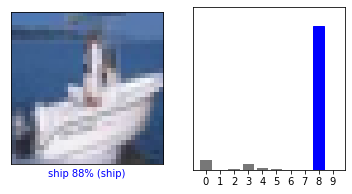

In [32]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

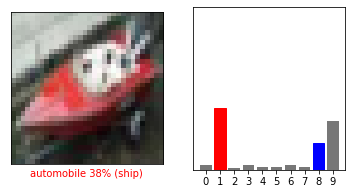

In [33]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

Let's plot several images with their predictions. Note that the model can be wrong even when very confident.

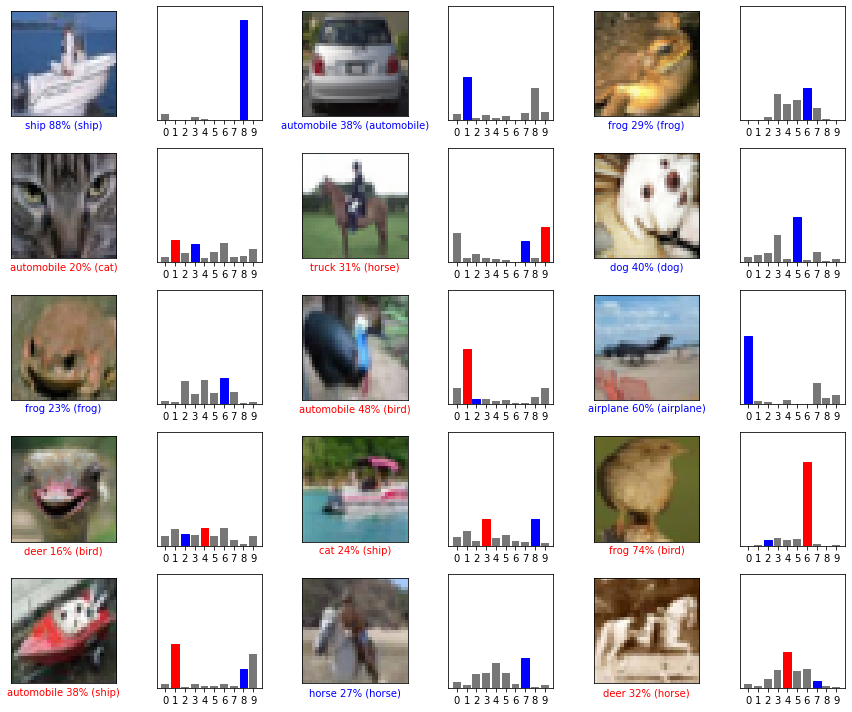

In [34]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

Finally, use the trained model to make a prediction about a single image.

In [35]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(32, 32, 3)


`tf.keras` models are optimized to make predictions on a *batch*, or collection, of examples at once. Accordingly, even though you're using a single image, you need to add it to a list:

In [36]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 32, 32, 3)


Now predict the correct label for this image:

In [37]:
predictions_single = model.predict(img)

print(predictions_single)

[[0.05968754 0.3840487  0.02270649 0.04543822 0.02376582 0.03474428
  0.00745101 0.06308912 0.2874787  0.07159015]]


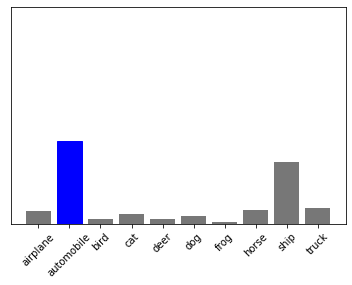

In [38]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

`model.predict` returns a list of lists—one list for each image in the batch of data. Grab the predictions for our (only) image in the batch:

In [39]:
np.argmax(predictions_single[0])

1

And the model predicts a label as expected.

In [40]:
def plot_training(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs_range = range(epochs)

    plt.clf()
    
    plt.figure(figsize=(8, 8))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')
    
    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

<Figure size 432x288 with 0 Axes>

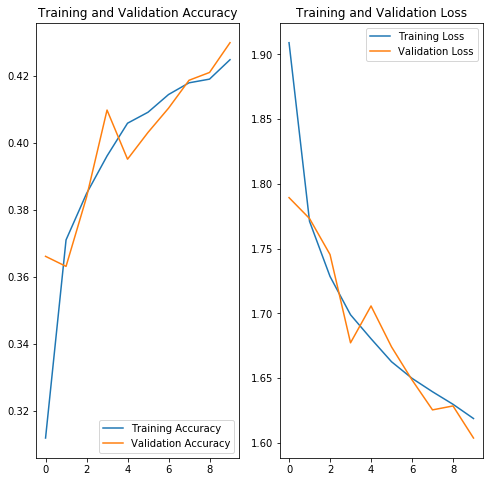

In [41]:
plot_training(history)

# Overfitting

In the plots above, the training accuracy is increasing constantly over time, whereas validation accuracy stalls around 85% in the training process. Also, the difference in accuracy between training and validation accuracy is noticeable a sign of overfitting.
When there are a small number of training examples, the model sometimes learns from noises or unwanted details from training examples to an extent that it negatively impacts the performance of the model on new examples. This phenomenon is known as overfitting. It means that the model will have a difficult time generalizing on a new dataset.

There are multiple ways to fight overfitting in the training process. In this tutorial, you'll use data augmentation and add dropout to our model.

## Data augmentation

In [42]:
train_images = train_images.reshape(train_images.shape)
train_images = train_images.astype('float32')
validation_images = np.concatenate((validation_images, test_images), axis=0)
validation_labels = np.concatenate((validation_labels, test_labels), axis=0)
validation_images = validation_images.reshape(validation_images.shape[0], 32, 32, 3)
validation_images = validation_images.astype('float32')

In [43]:
validation_images.shape

(10000, 32, 32, 3)

In [44]:
validation_labels.shape

(10000,)

In [45]:
gen = keras.preprocessing.image.ImageDataGenerator(
                    rotation_range=20,
                    width_shift_range=.1,
                    height_shift_range=.1,
                    horizontal_flip=True,
                    zoom_range=0.1,
                    )

In [46]:
training_set = gen.flow(train_images, train_labels)
validation_set = gen.flow(validation_images, validation_labels)

In [47]:
training_set[0][0].shape

(32, 32, 32, 3)

In [48]:
training_set[0][1].shape

(32,)

In [49]:
validation_set[0][0].shape

(32, 32, 32, 3)

In [50]:
validation_set[0][1].shape

(32,)

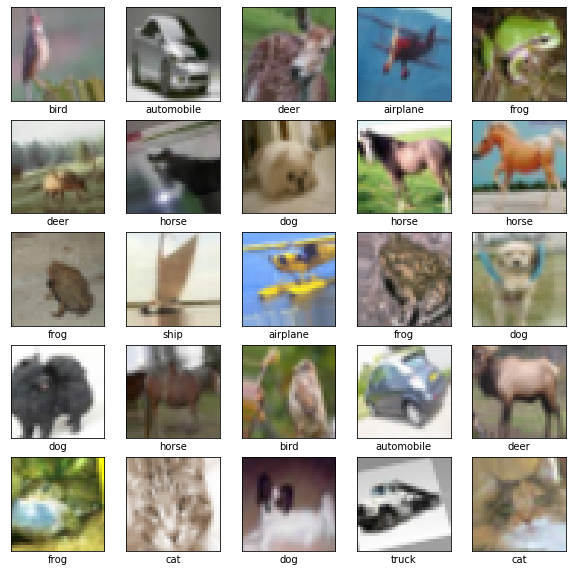

In [51]:
plot_some_inputs(training_set[0][0], training_set[0][1])

In [52]:
model2 = keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [53]:
model2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [54]:
history2 = model2.fit(training_set, 
                    epochs=epochs,
                    validation_data=validation_set)

Train for 1563 steps, validate for 313 steps
Epoch 1/10
1563/1563 [==============================] - 33s 21ms/step - loss: 1.9495 - accuracy: 0.2956 - val_loss: 1.8530 - val_accuracy: 0.3278
Epoch 2/10
1563/1563 [==============================] - 31s 20ms/step - loss: 1.8308 - accuracy: 0.3423 - val_loss: 1.8077 - val_accuracy: 0.3569
Epoch 3/10
1563/1563 [==============================] - 32s 20ms/step - loss: 1.7931 - accuracy: 0.3587 - val_loss: 1.7479 - val_accuracy: 0.3817
Epoch 4/10
1563/1563 [==============================] - 31s 20ms/step - loss: 1.7708 - accuracy: 0.3667 - val_loss: 1.7341 - val_accuracy: 0.3749
Epoch 5/10
1563/1563 [==============================] - 31s 20ms/step - loss: 1.7563 - accuracy: 0.3712 - val_loss: 1.7311 - val_accuracy: 0.3795
Epoch 6/10
1563/1563 [==============================] - 31s 20ms/step - loss: 1.7417 - accuracy: 0.3756 - val_loss: 1.7326 - val_accuracy: 0.3810
Epoch 7/10
1563/1563 [==============================] - 31s 20ms/step - loss: 1

<Figure size 432x288 with 0 Axes>

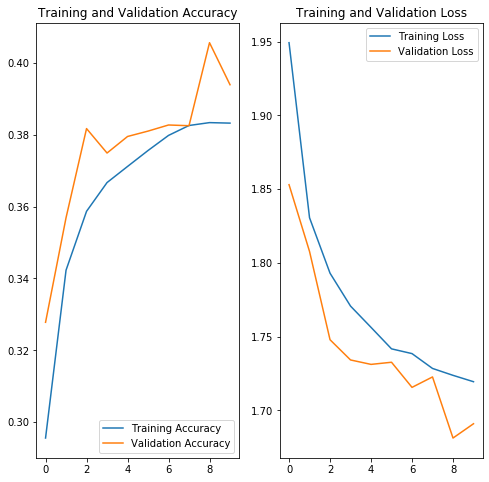

In [55]:
plot_training(history2)

## Dropout

Dropout is one of the most effective and most commonly used regularization techniques for neural networks, developed by Hinton and his students at the University of Toronto. Dropout, applied to a layer, consists of randomly "dropping out" (i.e. set to zero) a number of output features of the layer during training. Let's say a given layer would normally have returned a vector [0.2, 0.5, 1.3, 0.8, 1.1] for a given input sample during training; after applying dropout, this vector will have a few zero entries distributed at random, e.g. [0, 0.5, 1.3, 0, 1.1]. The "dropout rate" is the fraction of the features that are being zeroed-out; it is usually set between 0.2 and 0.5. At test time, no units are dropped out, and instead the layer's output values are scaled down by a factor equal to the dropout rate, so as to balance for the fact that more units are active than at training time.

In `tf.keras` you can introduce dropout in a network via the Dropout layer, which gets applied to the output of layer right before.

## Weight regularization

You may be familiar with Occam's Razor principle: given two explanations for something, the explanation most likely to be correct is the "simplest" one, the one that makes the least amount of assumptions. This also applies to the models learned by neural networks: given some training data and a network architecture, there are multiple sets of weights values (multiple models) that could explain the data, and simpler models are less likely to overfit than complex ones.

A "simple model" in this context is a model where the distribution of parameter values has less entropy (or a model with fewer parameters altogether, as we saw in the section above). Thus a common way to mitigate overfitting is to put constraints on the complexity of a network by forcing its weights only to take small values, which makes the distribution of weight values more "regular". This is called "weight regularization", and it is done by adding to the loss function of the network a cost associated with having large weights. This cost comes in two flavors:

* (L1 regularization)[https://developers.google.com/machine-learning/glossary/#L1_regularization], where the cost added is proportional to the absolute value of the weights coefficients (i.e. to what is called the "L1 norm" of the weights).

* (L2 regularization)[https://developers.google.com/machine-learning/glossary/#L2_regularization], where the cost added is proportional to the square of the value of the weights coefficients (i.e. to what is called the squared "L2 norm" of the weights). L2 regularization is also called weight decay in the context of neural networks. Don't let the different name confuse you: weight decay is mathematically the exact same as L2 regularization.

L1 regularization introduces sparsity to make some of your weight parameters zero. L2 regularization will penalize the weights parameters without making them sparse—one reason why L2 is more common.

In `tf.keras`, weight regularization is added by passing weight regularizer instances to layers as keyword arguments. Let's add L2 weight regularization now.

In [56]:
model3 = keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(128, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(10, activation='softmax')
])

In [57]:
model3.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [58]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               393344    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
Total params: 394,634
Trainable params: 394,634
Non-trainable params: 0
_________________________________________________________________


In [59]:
history3 = model3.fit(training_set, 
                    epochs=epochs,
                    validation_data=validation_set)


Train for 1563 steps, validate for 313 steps
Epoch 1/10
1563/1563 [==============================] - 36s 23ms/step - loss: 2.0889 - accuracy: 0.2558 - val_loss: 1.9446 - val_accuracy: 0.2945
Epoch 2/10
1563/1563 [==============================] - 32s 21ms/step - loss: 1.9618 - accuracy: 0.2878 - val_loss: 1.8892 - val_accuracy: 0.3137
Epoch 3/10
1563/1563 [==============================] - 31s 20ms/step - loss: 1.9456 - accuracy: 0.2967 - val_loss: 1.8882 - val_accuracy: 0.3276
Epoch 4/10
1563/1563 [==============================] - 31s 20ms/step - loss: 1.9469 - accuracy: 0.2979 - val_loss: 1.8662 - val_accuracy: 0.3396
Epoch 5/10
1563/1563 [==============================] - 31s 20ms/step - loss: 1.9410 - accuracy: 0.3023 - val_loss: 1.8946 - val_accuracy: 0.3201
Epoch 6/10
1563/1563 [==============================] - 31s 20ms/step - loss: 1.9378 - accuracy: 0.3053 - val_loss: 1.9139 - val_accuracy: 0.3146
Epoch 7/10
1563/1563 [==============================] - 31s 20ms/step - loss: 1

<Figure size 432x288 with 0 Axes>

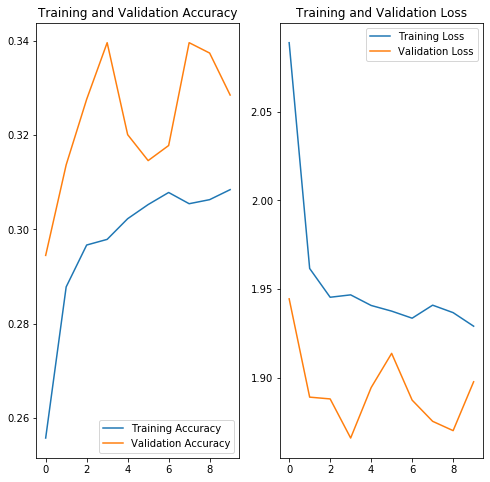

In [60]:
plot_training(history3)

dropout is activated when evaluating the performances on training set but deactivated when evaluating on the validation set

In [61]:
test_loss, test_acc = model3.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

1000/1 - 0s - loss: 1.7623 - accuracy: 0.3450

Test accuracy: 0.345


## Adding a new layer

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               393344    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 10)                650       
Total params: 402,250
Trainable params: 402,250
Non-trainable params: 0
________________________________________________

<Figure size 432x288 with 0 Axes>

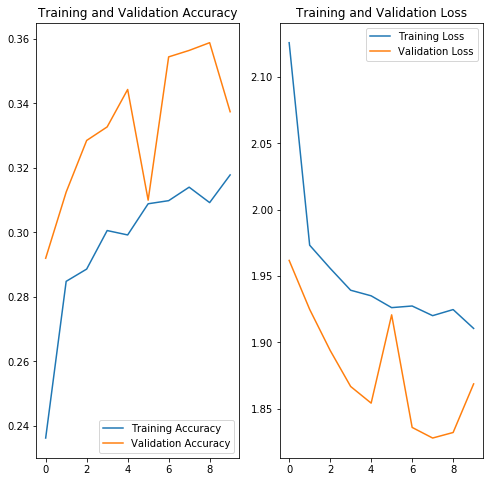

In [62]:
model4 = keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(128, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(64, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(10, activation='softmax')
])

model4.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model4.summary()

history4 = model4.fit(training_set, 
                    epochs=epochs,
                    validation_data=validation_set)


plot_training(history4)

## A Convolutional block

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 128)       3584      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 128)       0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 28800)             0         
_________________________________________________________________
dense_9 (Dense)              (None, 32)                921632    
_________________________________________________________________
dropout_3 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 10)                330       
Total params: 925,546
Trainable params: 925,546
Non-trainable params: 0
________________________________________________

<Figure size 432x288 with 0 Axes>

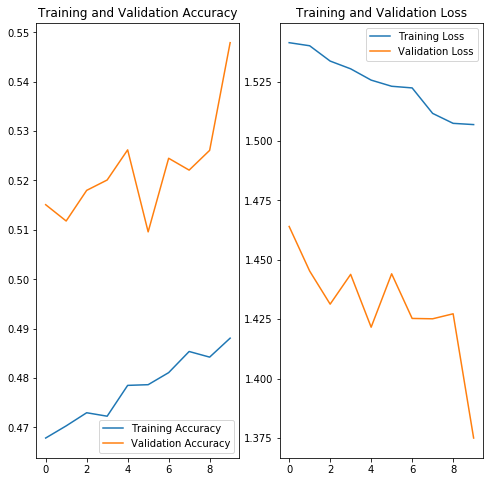

In [64]:
model6 = keras.Sequential([
    keras.layers.Conv2D(128, (3, 3), activation='relu', input_shape=(32,32,3)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.1),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(10, activation='softmax')
])

model5.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model5.summary()

history5 = model5.fit(training_set, 
                    epochs=epochs,
                    validation_data=validation_set)


plot_training(history5)

Train for 1563 steps, validate for 313 steps
Epoch 1/30
1563/1563 [==============================] - 80s 51ms/step - loss: 1.5026 - accuracy: 0.4862 - val_loss: 1.4033 - val_accuracy: 0.5359
Epoch 2/30
1563/1563 [==============================] - 79s 50ms/step - loss: 1.4937 - accuracy: 0.4906 - val_loss: 1.4064 - val_accuracy: 0.5301
Epoch 3/30
1563/1563 [==============================] - 75s 48ms/step - loss: 1.4927 - accuracy: 0.4920 - val_loss: 1.4216 - val_accuracy: 0.5267
Epoch 4/30
1563/1563 [==============================] - 75s 48ms/step - loss: 1.4903 - accuracy: 0.4936 - val_loss: 1.4238 - val_accuracy: 0.5310
Epoch 5/30
1563/1563 [==============================] - 80s 51ms/step - loss: 1.4902 - accuracy: 0.4938 - val_loss: 1.3974 - val_accuracy: 0.5377
Epoch 6/30
1563/1563 [==============================] - 79s 50ms/step - loss: 1.4829 - accuracy: 0.4982 - val_loss: 1.4078 - val_accuracy: 0.5359
Epoch 7/30
1563/1563 [==============================] - 79s 50ms/step - loss: 1

ValueError: x and y must have same first dimension, but have shapes (10,) and (30,)

<Figure size 432x288 with 0 Axes>

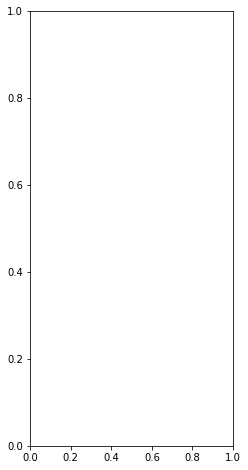

In [65]:
epochs=30
history5 = model5.fit(training_set, 
                    epochs=epochs,
                    validation_data=validation_set)


plot_training(history5)

<Figure size 432x288 with 0 Axes>

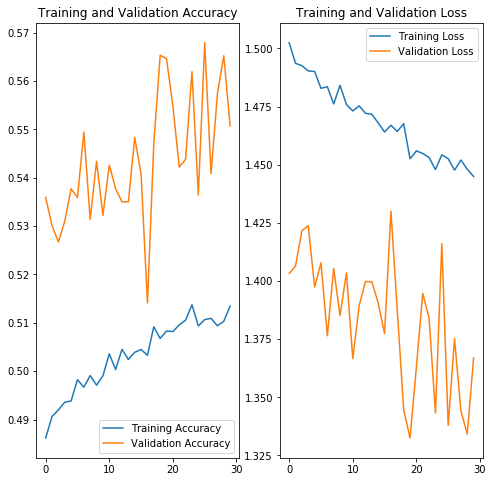

In [67]:
plot_training(history5)